<a href="https://colab.research.google.com/github/kok554/computervision/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import load_model # 저장된 모델을 불러오기
from tensorflow.keras.models import Sequential # 새로운 Sequential
from tensorflow.keras.layers import Dense # 완전 연결된 신경망 레이어
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 깃허브에 준비된 데이터를 로컬 환경으로 복사합니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터셋을 불러옵니다. 데이터 파일의 첫 번째 행에 헤더가 없으므로 header=None으로 설정합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터셋의 첫 5개 행을 출력하여 내용을 확인합니다.
df.head()

Cloning into 'data'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 32 (delta 7), reused 23 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 467.96 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (7/7), done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# 와인의 속성을 X로, 와인의 분류를 y로 저장합니다.
X = df.iloc[:, 0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋을 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행한다
history = model.fit(X_train, y_train, epochs=20, batch_size=100)

# 테스트셋에 모델을 평가합니다
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8189 - loss: 1.4645
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9288 - loss: 0.2100
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9392 - loss: 0.1894
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9405 - loss: 0.1806
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9513 - loss: 0.1598
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9481 - loss: 0.1664
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9416 - loss: 0.1683
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1538
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.1508
Epoch 10/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.1349
Epoch 11/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9567 - loss: 0.1252
Epoch 12/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9615 - l

In [4]:
modelpath ="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint # 모델 학습 중 특정 조건에 따라 모델을 저장하는 콜백클래ㅡㅅ

checkpointer = ModelCheckpoint(
    filepath='./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras',  # 모델이 저장될 파일 경로 및 이름 패턴
    verbose = 1
)

In [6]:
# 모델 학습 및 검증 진행
history = model.fit(
    X_train,
    y_train,
    epochs = 50, # 전체 학습 반복 횟수
    batch_size = 500,
    validation_split = 0.25,
    callbacks = [checkpointer]
)

# 테스트 데이터로 모델 성능 평가
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9716 - loss: 0.0996
Epoch 1: saving model to ./data/model/all/01-0.9754.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.9714 - loss: 0.0993 - val_accuracy: 0.9754 - val_loss: 0.0846
Epoch 2/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9660 - loss: 0.1153
Epoch 2: saving model to ./data/model/all/02-0.9723.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9751 - loss: 0.0905 - val_accuracy: 0.9723 - val_loss: 0.0880
Epoch 3/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9700 - loss: 0.0692
Epoch 3: saving model to ./data/model/all/03-0.9746.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9692 - loss: 0.0808 - val_accuracy: 0.9746 - val_loss: 0.0880
Epoch 4/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9780 - loss: 0.1091
Epoch 4: saving model to ./data/model/all/04-0.9692.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9779 - loss: 0.0866 - val_accuracy: 0.9692

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs = 2000,
    batch_size =500,
    validation_split = 0.25
)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9854 - loss: 0.0642 - val_accuracy: 0.9808 - val_loss: 0.0609
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9866 - loss: 0.0550 - val_accuracy: 0.9823 - val_loss: 0.0598
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9873 - loss: 0.0508 - val_accuracy: 0.9815 - val_loss: 0.0598
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9846 - loss: 0.0539 - val_accuracy: 0.9815 - val_loss: 0.0594
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9857 - loss: 0.0568 - val_accuracy: 0.9831 - val_loss: 0.0590
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9860 - loss: 0.0512 - val_accuracy: 0.9831 - val_loss: 0.0635
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9865 - loss: 0.0527 - val_accuracy: 0.9831 - val_loss: 0.0588
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9876 - loss: 0.0465 - val_accuracy: 0.9838 - val_loss

In [9]:
hist_df = pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.985887,0.058096,0.980769,0.060903
1,0.985630,0.055946,0.982308,0.059841
2,0.985117,0.055639,0.981538,0.059825
3,0.984090,0.055988,0.981538,0.059445
4,0.984860,0.056536,0.983077,0.058961
...,...,...,...,...
1995,0.991532,0.029608,0.986923,0.036616
1996,0.991532,0.031188,0.984615,0.038451
1997,0.992045,0.030250,0.989231,0.032246
1998,0.992558,0.028990,0.988462,0.036492


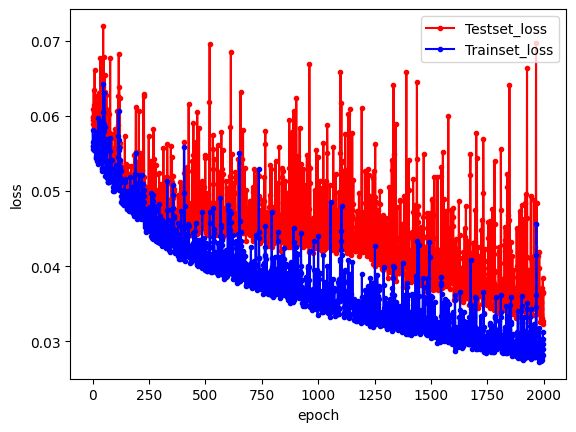

In [10]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습이 언제 자동 중단될지 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델 이름을 정함
modelpath = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras'

# 최적화 모델을 업데이트하고 저장합니다
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss',
                               verbose=0, save_best_only=True)

history = model.fit(
    X_train,
    y_train,
    epochs=2000,
    batch_size= 500,
    validation_split = 0.25,
    verbose = 1,
    callbacks=[early_stopping, checkpointer]
)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9924 - loss: 0.0314 - val_accuracy: 0.9854 - val_loss: 0.0379
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9910 - loss: 0.0303 - val_accuracy: 0.9862 - val_loss: 0.0352
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9934 - loss: 0.0297 - val_accuracy: 0.9869 - val_loss: 0.0369
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9932 - loss: 0.0263 - val_accuracy: 0.9800 - val_loss: 0.0545
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9892 - loss: 0.0377 - val_accuracy: 0.9854 - val_loss: 0.0388
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9932 - loss: 0.0280 - val_accuracy: 0.9877 - val_loss: 0.0364
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9922 - loss: 0.0295 - val_accuracy: 0.9869 - val_loss: 0.0389
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9937 - loss: 0.0242 - val_accuracy: 0.9854 - val_

In [14]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:',score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9899 - loss: 0.0416
Test accuracy: 0.9884615540504456
